# Star Wars Survey

## Read the data

In [39]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

%matplotlib inline
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [40]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [41]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

So a major problem we notice is that the characters' names appears in unnamend columns and we should understand what they mean. We will address this later.


## Claning columns: converting yes/no asnwers to boolean
Now we proceed to clean the 2nd and 3rd columns to boolean values so they're easier to analyse

In [42]:
star_wars.iloc[:,1].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [43]:
star_wars.iloc[:,2].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [44]:
star_wars.iloc[:,30].value_counts(dropna=False)

No     615
NaN    358
Yes    213
Name: Are you familiar with the Expanded Universe?, dtype: int64

In [45]:
star_wars.iloc[:,31].value_counts(dropna=False)

NaN    973
No     114
Yes     99
Name: Do you consider yourself to be a fan of the Expanded Universe?, dtype: int64

In [46]:
star_wars.iloc[:,32].value_counts(dropna=False)

No     641
Yes    427
NaN    118
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64

In [47]:
#Dictionary to convert yes/no to boolean values

yes_no = {
    "Yes": True,
    "No": False
         }

#Apply the dictionary to the selected columns
star_wars.iloc[:,1] = star_wars.iloc[:,1].map(yes_no) # SW seen
star_wars.iloc[:,2] = star_wars.iloc[:,2].map(yes_no) # SW fan
star_wars.iloc[:,30] = star_wars.iloc[:,30].map(yes_no) # Familiar with EU
star_wars.iloc[:,31] = star_wars.iloc[:,31].map(yes_no) # EU fan
star_wars.iloc[:,32] = star_wars.iloc[:,32].map(yes_no) # ST fan

## Cleaning columns: episodes seen
4th to 9th columns ask about which film has been seen by the participant but the answer is the name of each film. Let's convert the values to boolean, meaning that a non-null cell is True, a null cell is False

In [48]:
def episodes(x):
    if pd.isnull(x):
        return False
    else:
        return True

star_wars.iloc[:,3:9] = star_wars.iloc[:,3:9].applymap(episodes)

In [49]:
#Creating a dictionary to rename episodes seen column names

seen_renaming = {}
episode = 1
for col in star_wars.columns[3:9]:
    new_name = "seen_{}".format(episode)
    seen_renaming[col] = new_name
    episode +=1

#renaming episodes columns    
star_wars.rename(columns = seen_renaming, inplace = True)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,False,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,True,False,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning columns: episode ranking
Now we have clean columns until the 9th one. 
Let's proceed to clean the 10th to 15th columns, where it is asked to rank the favourite films. We have to convert them to numeric values and set the column names to more straightforward.

In [50]:
star_wars.iloc[:,9:15] = star_wars.iloc[:,9:15].astype(float)

In [51]:
#Creating a dictionary to rename episode ranking columns

ranking_renaming = {}
episode = 1
for col in star_wars.columns[9:15]:
    new_name = "ranking_{}".format(episode)
    ranking_renaming[col] = new_name
    episode += 1

#renaming ranking columns    
star_wars.rename(columns = ranking_renaming, inplace = True)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,False,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,True,False,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning columns: character favourability

In [52]:
star_wars.iloc[:, 15:29].columns

Index(['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28'],
      dtype='object')

In [53]:
#Creating a dictionary to rename characters

characters_map = {'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo',
            'Unnamed: 16': 'Luke Skywalker',
            'Unnamed: 17': 'Princess Leia Organa',
            'Unnamed: 18': 'Anakin Skywalker',
            'Unnamed: 19': 'Obi Wan Kenobi',
            'Unnamed: 20': 'Emperor Palpatine',
            'Unnamed: 21': 'Darth Vather',
            'Unnamed: 22': 'Lando Calrissian',
            'Unnamed: 23': 'Boba Fett',
            'Unnamed: 24': 'C-3P0',
            'Unnamed: 25': 'R2-D2',
            'Unnamed: 26': 'Jar Jar Binks',
            'Unnamed: 27': 'Pamde Amidala',
            'Unnamed: 28': 'Yoda'
            } 
             

#renaming ranking columns    
star_wars.rename(columns = characters_map, inplace = True)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,False,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,True,False,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [54]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vather', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2-D2',
       'Jar Jar Binks', 'Pamde Amidala', 'Yoda', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
      dtype='object')

# Who has seen which episode?

In [55]:
#how many have seen all six episodes?
all_episodes = star_wars.iloc[:,3:9].all(axis=1) #bool index
all_episodes.sum()

471

In [56]:
#how many have seen only I-II-III episodes?
first_3 = star_wars.iloc[:,3:6].all(axis=1).sum() #bool index
first_3.sum()

516

In [57]:
#how many have seen only IV-V-VI episodes?
second_3 = star_wars.iloc[:,6:9].all(axis=1).sum() #bool index
second_3.sum()


592

Let's see how many people have seen each episode

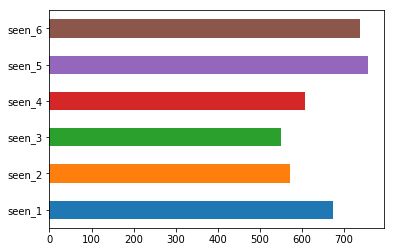

In [58]:
star_wars.iloc[:,3:9].sum(axis=0).plot(kind = 'barh')

I would expect to see much more uniform figures inside each trilogy, but I see for example that there is a strong difference between who has seen episode 4 and 5/6.

## Analysis by fan/not fan of Star Wars

In [59]:
star_wars.columns[2]

'Do you consider yourself to be a fan of the Star Wars film franchise?'

In [60]:
SW_fans = star_wars[star_wars.iloc[:,2]==True]
SW_not_fans = star_wars[star_wars.iloc[:,2]==False]

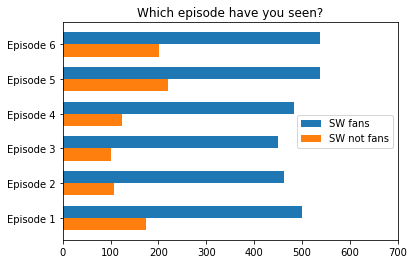

In [61]:
# Star Wars Fans
ylabels = ['Episode 1','Episode 2', 'Episode 3', 'Episode 4', 'Episode 5', 'Episode 6']
seen_fans = SW_fans.iloc[:,3:9].sum()
seen_not_fans = SW_not_fans.iloc[:,3:9].sum()

width = 0.35 
yticks_pos = np.arange(6)
y_pos_fans = np.arange(6) + width/2
y_pos_not_fans = np.arange(6) - width/2

fig, ax = plt.subplots()
ax.barh(y_pos_fans, seen_fans, width, label = 'SW fans')
ax.barh(y_pos_not_fans, seen_not_fans, width, label = 'SW not fans')
ax.set_title('Which episode have you seen?')
ax.set_yticks(yticks_pos)
ax.set_yticklabels(ylabels)
ax.set_xlim(0,700)
ax.legend(loc = 0)


## Analysis by gender

In [62]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

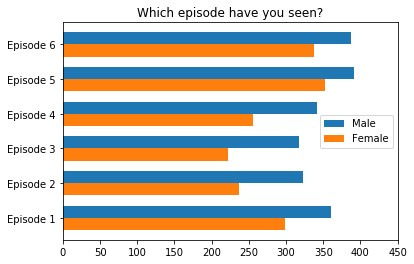

In [63]:
# Genders
seen_males = males.iloc[:,3:9].sum()
seen_females = females.iloc[:,3:9].sum()

width = 0.35 
yticks_pos = np.arange(6)
y_pos_fans = np.arange(6) + width/2
y_pos_not_fans = np.arange(6) - width/2

fig, ax = plt.subplots()
ax.barh(y_pos_fans, seen_males, width, label = 'Male')
ax.barh(y_pos_not_fans, seen_females, width, label = 'Female')
ax.set_title('Which episode have you seen?')
ax.set_yticks(yticks_pos)
ax.set_yticklabels(ylabels)
ax.set_xlim(0,450)
ax.legend(loc=7)

# How do they rank each episode?

In order to analyse how people ranked each film, we need to filter the respondent who have seen all six films, otherwise the ranking wouldn't make sense

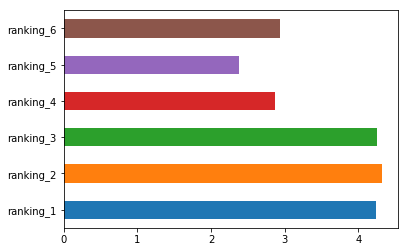

In [81]:
# Creating a subgroup with only the rankings 
# of only who have seen all six films

rankings = star_wars[all_episodes].iloc[:,9:15] #using the boolean index created before
mean_rankings = rankings.mean()
mean_rankings.plot(kind = 'barh')

We can see a clear difference between the first and the second trilogy, being the second one (firstly released) much better ranked. Comparing with who have seen the episodes, we can understand that there was a decreasing interest in watching episode 1 to 3, and that is confirmed by a lower rankings of these new episodes.

## Alternative ranking

In [159]:
episode_rankings = {}
ep = 1
for i in range(3,9): 
    episode = 'ranking_{}'.format(ep)
    six = star_wars.iloc[:,(i+6)][star_wars.iloc[:,i]][star_wars[episode]==6].count()
    five = star_wars.iloc[:,(i+6)][star_wars.iloc[:,i]][star_wars[episode]==5].count()
    four = star_wars.iloc[:,(i+6)][star_wars.iloc[:,i]][star_wars[episode]==4].count()
    three = star_wars.iloc[:,(i+6)][star_wars.iloc[:,i]][star_wars[episode]==3].count()
    two = star_wars.iloc[:,(i+6)][star_wars.iloc[:,i]][star_wars[episode]==2].count()
    one = star_wars.iloc[:,(i+6)][star_wars.iloc[:,i]][star_wars[episode]==1].count()
    episode_rankings['episode_{}'.format(ep)] = [six, five, four, three, two, one]
    ep += 1

episode_rankings


{'episode_1': [150, 89, 183, 85, 51, 115],
 'episode_2': [86, 206, 104, 72, 75, 28],
 'episode_3': [123, 118, 139, 95, 40, 34],
 'episode_4': [62, 32, 69, 114, 129, 201],
 'episode_5': [34, 62, 43, 105, 228, 286],
 'episode_6': [66, 34, 54, 214, 227, 143]}

In [160]:
index = ['6th', '5th', '4th', '3rd', '2nd', '1st']
episode_table = pd.DataFrame(episode_rankings, index = index)

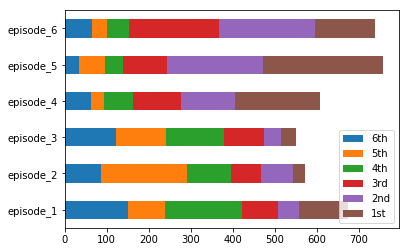

In [174]:
episode_table.transpose().plot(kind = 'barh', stacked = True)

## Analysis by fan/not fan of Star Wars

In [66]:
SW_fans_ranking = SW_fans.iloc[:,9:15].mean(axis=0)
SW_not_fans_ranking = SW_not_fans.iloc[:,9:15].mean(axis=0)

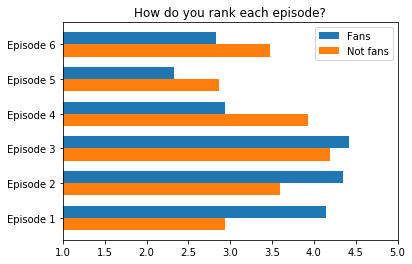

In [67]:
# Ranking of fans/not fans
width = 0.35 
yticks_pos = np.arange(6)
y_pos_fans = np.arange(6) + width/2
y_pos_not_fans = np.arange(6) - width/2

fig, ax = plt.subplots()
ax.barh(y_pos_fans, SW_fans_ranking, width, label = 'Fans')
ax.barh(y_pos_not_fans, SW_not_fans_ranking, width, label = 'Not fans')
ax.set_title('How do you rank each episode?')
ax.set_yticks(yticks_pos)
ax.set_yticklabels(ylabels)
ax.set_xlim(1,5)
ax.legend(loc=0)

It's interesting to notice a split in rankings between fans and not fans. The former rank the first trilogy better than not fans, ans vice-versa. They both agree that Episode 3 is the worst. Episode 5 is the best ranked by Fans and it's ranked as good as Episode 1 by not fans.

## Analysis by gender

In [68]:
males_ranking = males.iloc[:,9:15].mean(axis=0)
females_ranking = females.iloc[:,9:15].mean(axis=0)

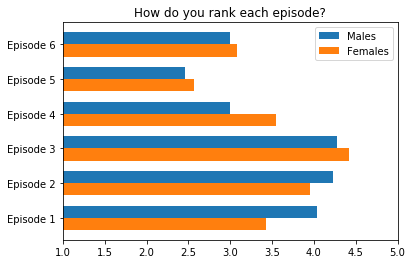

In [69]:
# Ranking of male/females
width = 0.35 
yticks_pos = np.arange(6)
y_pos_fans = np.arange(6) + width/2
y_pos_not_fans = np.arange(6) - width/2

fig, ax = plt.subplots()
ax.barh(y_pos_fans, males_ranking, width, label = 'Males')
ax.barh(y_pos_not_fans, females_ranking, width, label = 'Females')
ax.set_title('How do you rank each episode?')
ax.set_yticks(yticks_pos)
ax.set_yticklabels(ylabels)
ax.set_xlim(1,5)
ax.legend(loc=0)

# Characters favourability

In order to simplify the analysis we will divide the favourability votes in four categories, as well as did by [FiveThirtyEight](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/):

- Favourable
- Neutral
- Unfavourable
- Unfamiliar


In [123]:
# dividing favourability in 4 categories

favourability = {}
for i in (range(15,29)):
    character_name =  star_wars.columns[i]
    values = star_wars.iloc[:, i].value_counts()/len(star_wars[star_wars.iloc[:, i].notna()])
    favourable = values[values.index.str.contains(r'(?<!Neither )\bfavorably')].sum().round(3)
    neutral = values[values.index.str.contains('neutral')].sum().round(3)
    unfavourable = values[values.index.str.contains(r'(?<!nor )\bunfavorably')].sum().round(3)
    unfamiliar = values[values.index.str.contains('Unfamiliar')].sum().round(3)
    favourability[character_name] = [favourable, neutral, unfavourable, unfamiliar]
favourability

{'Han Solo': [0.918, 0.053, 0.011, 0.018],
 'Luke Skywalker': [0.928, 0.046, 0.019, 0.007],
 'Princess Leia Organa': [0.911, 0.058, 0.022, 0.01],
 'Anakin Skywalker': [0.625, 0.164, 0.148, 0.063],
 'Obi Wan Kenobi': [0.909, 0.052, 0.018, 0.021],
 'Emperor Palpatine': [0.311, 0.262, 0.236, 0.192],
 'Darth Vather': [0.582, 0.102, 0.304, 0.012],
 'Lando Calrissian': [0.445, 0.288, 0.087, 0.18],
 'Boba Fett': [0.358, 0.305, 0.174, 0.163],
 'C-3P0': [0.85, 0.096, 0.036, 0.018],
 'R2-D2': [0.9, 0.069, 0.019, 0.012],
 'Jar Jar Binks': [0.295, 0.2, 0.373, 0.133],
 'Pamde Amidala': [0.431, 0.254, 0.113, 0.201],
 'Yoda': [0.907, 0.062, 0.019, 0.012]}

In [111]:
index = ['Favourable', 'Neutral', 'Unfavourable', 'Unfamiliar']
Fav_table = pd.DataFrame(favourability, index = index)

# Transposing for better visualization
Fav_table = Fav_table.transpose()
Fav_table

,Favourable,Neutral,Unfavourable,Unfamiliar
Han Solo,0.918,0.053,0.011,0.018
Luke Skywalker,0.928,0.046,0.019,0.007
Princess Leia Organa,0.911,0.058,0.022,0.010
Anakin Skywalker,0.625,0.164,0.148,0.063
Obi Wan Kenobi,0.909,0.052,0.018,0.021
Emperor Palpatine,0.311,0.262,0.236,0.192
Darth Vather,0.582,0.102,0.304,0.012
Lando Calrissian,0.445,0.288,0.087,0.180
Boba Fett,0.358,0.305,0.174,0.163
C-3P0,0.850,0.096,0.036,0.018


In [72]:
Fav_table['Favourable'].idxmax()

'Luke Skywalker'

In [73]:
Fav_table['Unfavourable'].idxmax()

'Jar Jar Binks'

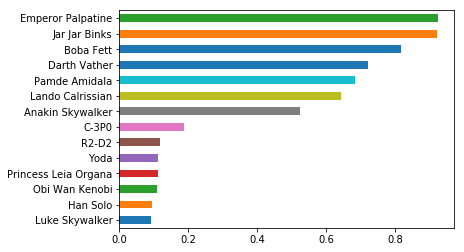

In [74]:
# Calculate a Polarization value as the absolute difference  
# between favourable and unfavourable votes, subtracted to 1

Fav_table['Polarization'] = 1-(abs(Fav_table['Favourable']-Fav_table['Unfavourable']))
Fav_table['Polarization'].sort_values().plot(kind = 'barh')

In [75]:
# most controversial characters, defined as the characters
# with the highest polarization level

Fav_table['Polarization'].abs().sort_values(ascending=False).head()

Emperor Palpatine    0.925
Jar Jar Binks        0.922
Boba Fett            0.816
Darth Vather         0.722
Pamde Amidala        0.682
Name: Polarization, dtype: float64

Not surprisingly, Luke Skywalker is the most favourite character and with the less polarization.

Jar Jar Binks is the less favourite characters but also one with the most polarized votes. There has been a lot of speculation about the actual villainy of this character, started from [this theory on Reddit](https://www.reddit.com/r/StarWars/comments/3qvj6w/theory_jar_jar_binks_was_a_trained_force_user/) 

In [76]:
# Visualization of characters favourability
# Calculating a normalized favourability without unfamiliar votes

values_sum = Fav_table.iloc[:,:3].sum(axis=1)
for col in Fav_table.columns[0:3]:
    norm_name = "{}_norm".format(col)
    Fav_table[norm_name] = Fav_table[col]/values_sum.copy()

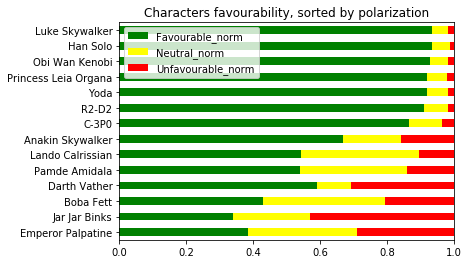

In [103]:
Fav_table_sorted = Fav_table.sort_values(by=['Polarization'], ascending = False)
Fav_table_sorted.rename = ['Favourable','Neutral','Unfavourable']
xlim = (0,1)
cmap = ListedColormap(["green", "yellow", "red"])
title = "Characters favourability, sorted by polarization"
Fav_table_sorted.iloc[:,5:8].plot(kind='barh', stacked=True, xlim=xlim, colormap = cmap, title = title)

So we can see that there's is a large agreement about the favourability of the main protagonists: Luke Skywalker, Han Solo, Obi Wan, Leia Organa, Yoda, R2-D2 and C-3P0

The least favourite characters, Jar Jar Binks and Palpatine are also the most controversial.